# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [11]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

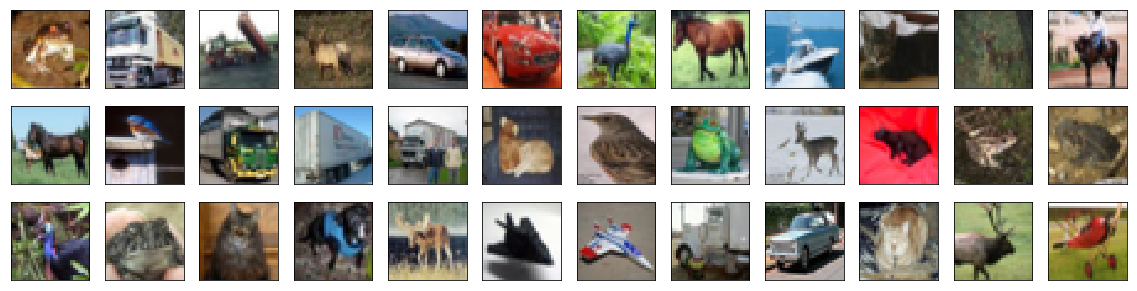

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [13]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [14]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 64)          0         
__________

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 6, 6, 64)          0         
__________

### 6. Compile the Model 

In [68]:
# compile the model
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### 7. Train the Model 

In [69]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=200,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.55584, saving model to model.weights.best.hdf5
19s - loss: 1.8360 - acc: 0.3241 - val_loss: 1.5558 - val_acc: 0.4372
Epoch 2/200
Epoch 00001: val_loss improved from 1.55584 to 1.36151, saving model to model.weights.best.hdf5
18s - loss: 1.5173 - acc: 0.4480 - val_loss: 1.3615 - val_acc: 0.5166
Epoch 3/200
Epoch 00002: val_loss did not improve
18s - loss: 1.3764 - acc: 0.5029 - val_loss: 1.4527 - val_acc: 0.4926
Epoch 4/200
Epoch 00003: val_loss improved from 1.36151 to 1.18571, saving model to model.weights.best.hdf5
18s - loss: 1.2808 - acc: 0.5439 - val_loss: 1.1857 - val_acc: 0.5790
Epoch 5/200
Epoch 00004: val_loss improved from 1.18571 to 1.07351, saving model to model.weights.best.hdf5
18s - loss: 1.2067 - acc: 0.5761 - val_loss: 1.0735 - val_acc: 0.6246
Epoch 6/200
Epoch 00005: val_loss improved from 1.07351 to 1.04755, saving model to model.weights.best.hdf5
18s - loss: 1.1

Epoch 00055: val_loss did not improve
18s - loss: 0.6300 - acc: 0.7913 - val_loss: 0.6650 - val_acc: 0.7780
Epoch 57/200
Epoch 00056: val_loss did not improve
18s - loss: 0.6334 - acc: 0.7911 - val_loss: 0.7023 - val_acc: 0.7710
Epoch 58/200
Epoch 00057: val_loss improved from 0.63324 to 0.63155, saving model to model.weights.best.hdf5
18s - loss: 0.6268 - acc: 0.7902 - val_loss: 0.6315 - val_acc: 0.7932
Epoch 59/200
Epoch 00058: val_loss did not improve
18s - loss: 0.6300 - acc: 0.7912 - val_loss: 0.6378 - val_acc: 0.7876
Epoch 60/200
Epoch 00059: val_loss did not improve
18s - loss: 0.6230 - acc: 0.7908 - val_loss: 0.7050 - val_acc: 0.7642
Epoch 61/200
Epoch 00060: val_loss did not improve
18s - loss: 0.6239 - acc: 0.7922 - val_loss: 0.6813 - val_acc: 0.7716
Epoch 62/200
Epoch 00061: val_loss did not improve
18s - loss: 0.6239 - acc: 0.7922 - val_loss: 0.6319 - val_acc: 0.7922
Epoch 63/200
Epoch 00062: val_loss improved from 0.63155 to 0.61874, saving model to model.weights.best.hdf5

Epoch 00122: val_loss did not improve
18s - loss: 0.6249 - acc: 0.7956 - val_loss: 0.6427 - val_acc: 0.7924
Epoch 124/200
Epoch 00123: val_loss did not improve
18s - loss: 0.6296 - acc: 0.7925 - val_loss: 0.6580 - val_acc: 0.7874
Epoch 125/200
Epoch 00124: val_loss did not improve
18s - loss: 0.6247 - acc: 0.7940 - val_loss: 0.9409 - val_acc: 0.6936
Epoch 126/200
Epoch 00125: val_loss did not improve
18s - loss: 0.6272 - acc: 0.7932 - val_loss: 0.8074 - val_acc: 0.7448
Epoch 127/200
Epoch 00126: val_loss did not improve
18s - loss: 0.6267 - acc: 0.7958 - val_loss: 0.8706 - val_acc: 0.7148
Epoch 128/200
Epoch 00127: val_loss did not improve
18s - loss: 0.6310 - acc: 0.7929 - val_loss: 0.7051 - val_acc: 0.7854
Epoch 129/200
Epoch 00128: val_loss did not improve
18s - loss: 0.6300 - acc: 0.7932 - val_loss: 0.7070 - val_acc: 0.7840
Epoch 130/200
Epoch 00129: val_loss did not improve
18s - loss: 0.6308 - acc: 0.7919 - val_loss: 0.7688 - val_acc: 0.7428
Epoch 131/200
Epoch 00130: val_loss di

Epoch 00190: val_loss did not improve
18s - loss: 0.7552 - acc: 0.7591 - val_loss: 0.8641 - val_acc: 0.7296
Epoch 192/200
Epoch 00191: val_loss did not improve
18s - loss: 0.7590 - acc: 0.7575 - val_loss: 0.7764 - val_acc: 0.7398
Epoch 193/200
Epoch 00192: val_loss did not improve
18s - loss: 0.7633 - acc: 0.7583 - val_loss: 0.6805 - val_acc: 0.7880
Epoch 194/200
Epoch 00193: val_loss did not improve
18s - loss: 0.7657 - acc: 0.7574 - val_loss: 0.8073 - val_acc: 0.7538
Epoch 195/200
Epoch 00194: val_loss did not improve
18s - loss: 0.7691 - acc: 0.7567 - val_loss: 1.0191 - val_acc: 0.6658
Epoch 196/200
Epoch 00195: val_loss did not improve
18s - loss: 0.7714 - acc: 0.7554 - val_loss: 0.7890 - val_acc: 0.7376
Epoch 197/200
Epoch 00196: val_loss did not improve
18s - loss: 0.7849 - acc: 0.7538 - val_loss: 0.8622 - val_acc: 0.7446
Epoch 198/200
Epoch 00197: val_loss did not improve
18s - loss: 0.7904 - acc: 0.7514 - val_loss: 0.8498 - val_acc: 0.7160
Epoch 199/200
Epoch 00198: val_loss di

### 8. Load the Model with the Best Validation Accuracy

In [70]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [71]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7856


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [72]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

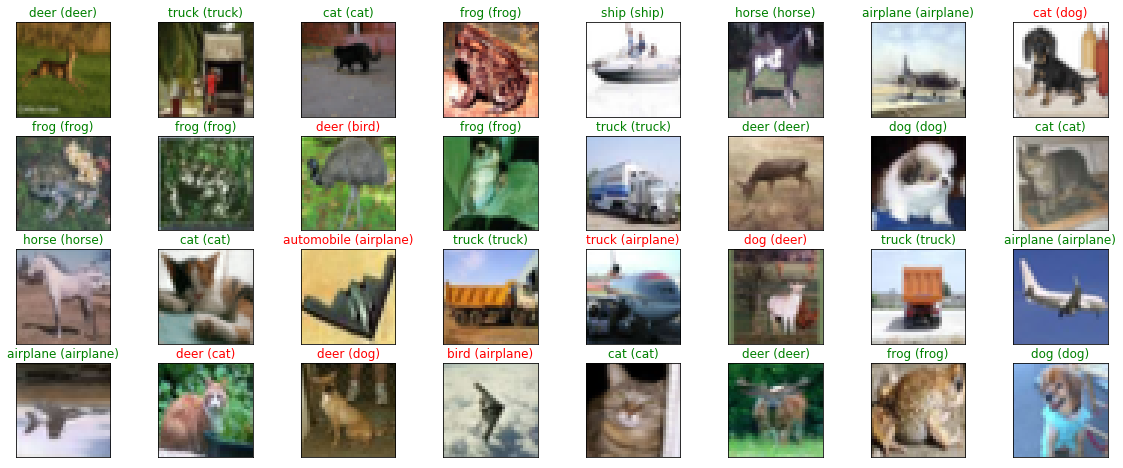

In [73]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))